In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
from sklearn.feature_selection import RFE
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('AAPL_data.csv',index_col=0)

In [12]:
#data.head()
#data.tail()
print(data.shape)
print(list(data.columns))

(8364, 6)
['Open', 'High', 'Low', 'Close', 'Volume', 'Increase']


In [21]:
data.head()

,Open,High,Low,Close,Volume,Increase
Date,,,,,,
9/7/1984,0.42388,0.42902,0.41874,0.42388,23220030,1
9/10/1984,0.42388,0.42516,0.41366,0.42134,18022532,0
9/11/1984,0.42516,0.43668,0.42516,0.42902,42498199,1
9/12/1984,0.42902,0.43157,0.41618,0.41618,37125801,0
9/13/1984,0.43927,0.44052,0.43927,0.43927,57822062,1


In [15]:
data['Increase'].value_counts()

1    4370
0    3994
Name: Increase, dtype: int64

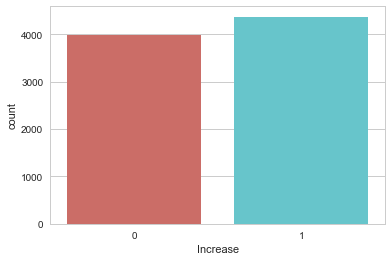

In [19]:
sns.countplot(x='Increase',data=data,palette='hls')
plt.show()

In [22]:
data.groupby('Increase').mean()

,Open,High,Low,Close,Volume
Increase,,,,,
0,22.730182,22.828968,22.363584,22.488758,1.081932e+08
1,21.876879,22.191426,21.771520,22.091153,1.052236e+08


In [41]:
model_data = data
#X = model_data.loc[:,"Open":"Volume"]
#X = model_data[["Open","High","Low","Close","Volume"]]
X = model_data.drop("Increase",axis=1)
y = model_data["Increase"]
#print(X)

In [44]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True]
[4 3 2 1 1]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train.shape
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.516


In [59]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.525


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1216
          1       0.52      1.00      0.68      1294

avg / total       0.27      0.52      0.35      2510



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


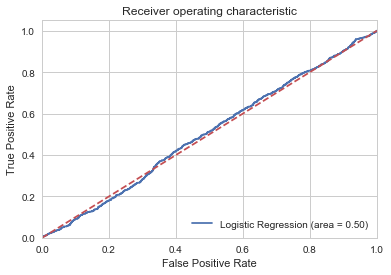

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
OHLCV = [[0.42516,0.43668,0.42516,0.42902,42498199]]
logreg.predict(OHLCV)

array([1], dtype=int64)